Imorting Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras_tuner as kt

In [22]:
import tensorflow as tf
print(tf.__version__)

2.16.2


In [23]:
pip install keras-tuner==1.4.7

  Using cached keras_tuner-1.4.7-py3-none-any.whl.metadata (5.4 kB)
  Using cached kt_legacy-1.0.5-py3-none-any.whl.metadata (221 bytes)
Using cached keras_tuner-1.4.7-py3-none-any.whl (129 kB)
Using cached kt_legacy-1.0.5-py3-none-any.whl (9.6 kB)

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: /Users/mihindew/tf_env/bin/python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
import keras_tuner as kt


In [ ]:
Data PreProcessing

Training Image Prepocessing

In [42]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'strain',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 16634 files belonging to 9 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [4]:
!pip install matplotlib.pyplot

ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Validation image preprocessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'svalid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 4158 files belonging to 9 classes.


In [7]:
validation_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))>

In [8]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[151.5  151.5  153.5 ]
   [155.   155.   157.  ]
   [149.75 149.75 151.75]
   ...
   [116.   116.   116.  ]
   [124.25 124.25 124.25]
   [125.5  125.5  125.5 ]]

  [[149.   149.   151.  ]
   [156.5  156.5  158.5 ]
   [149.75 149.75 151.75]
   ...
   [116.5  116.5  116.5 ]
   [116.5  116.5  116.5 ]
   [119.75 119.75 119.75]]

  [[153.25 153.25 155.25]
   [145.5  145.5  147.5 ]
   [151.75 151.75 153.75]
   ...
   [113.5  113.5  113.5 ]
   [117.   117.   117.  ]
   [108.75 108.75 108.75]]

  ...

  [[126.   124.   129.  ]
   [125.5  123.5  128.5 ]
   [127.   125.   130.  ]
   ...
   [130.5  130.5  130.5 ]
   [141.   141.   141.  ]
   [134.75 134.75 134.75]]

  [[130.25 128.25 133.25]
   [127.   125.   130.  ]
   [127.75 125.75 130.75]
   ...
   [133.75 133.75 133.75]
   [131.25 131.25 131.25]
   [126.25 126.25 126.25]]

  [[124.25 122.25 127.25]
   [123.5  121.5  126.5 ]
   [130.75 128.75 133.75]
   ...
   [134.5  134.5  134.5 ]
   [141.   141.   141.  ]
   [128.5  128.5  12

To avoid overshooting

Choose small learning rate default 0,001 we are using 0.0001
There may be chance of Underfitting, so increase number of neuron
Add more Convolutional layer to extract more feature from images there may be possibility that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature



Building Module

In [12]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers, models

Building Covolutional Layer

In [ ]:
#model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [10]:
# Function to build the model with hyperparameter tuning
def build_model(hp):
    model = models.Sequential()

In [39]:
def build_model(hp):
    model = models.Sequential()
    
    # Hyperparameter tuning for number of convolutional layers and filters
    for i in range(hp.Int('conv_layers', 2, 4)):
        model.add(layers.Conv2D(
            filters=hp.Int(f'filters_{i}', min_value=32, max_value=128, step=32),
            kernel_size=(3, 3),
            activation='relu',
            padding='same'
        ))
        model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    
    # Hyperparameter tuning for dropout rate
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    
    model.add(layers.Flatten())
    
    # Hyperparameter tuning for dense layer units
    model.add(layers.Dense(units=hp.Int('dense_units', min_value=64, max_value=256, step=64), activation='relu'))

    #Output Layer
    model.add(Dense(units=9,activation='softmax'))


    # Hyperparameter tuning for optimizer
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop', 'sgd']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

model.add(Dropout(0.25)) #To Avoid Overfitting

model.add(Flatten())

model.add(Dense(units=1500,activation='relu'))

model.add(Dropout(0.4))

#Output Layer
model.add(Dense(units=38,activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [43]:
# Initialize the KerasTuner Hyperband tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='plant_disease_detection'
)

# Early stopping callback to prevent overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)



Reloading Tuner from my_dir/plant_disease_detection/tuner0.json


In [45]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=1,  # Set the number of trials directly
    directory='my_dir',
    project_name='plant_disease_detection'
)

Reloading Tuner from my_dir/plant_disease_detection/tuner0.json


In [46]:
# Run the hyperparameter search
tuner.search(training_set, validation_data=validation_set, epochs=1, callbacks=[stop_early])

Trial 12 Complete [00h 04m 22s]
val_accuracy: 0.11664261668920517

Best val_accuracy So Far: 0.9379509091377258
Total elapsed time: 01h 10m 11s


In [47]:
# Get the optimal hyperparameters and build the best model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)

In [75]:
# Display the best hyperparameters
print("The best hyperparameters are:")
for param in best_hps.values:
    print(f"{param}: {best_hps.get(param)}")

The best hyperparameters are:
conv_layers: 4
filters_0: 128
filters_1: 96
dropout: 0.30000000000000004
dense_units: 256
optimizer: adam
filters_2: 128
filters_3: 96
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0


In [49]:
# Train the best model
history = model.fit(training_set, validation_data=validation_set, epochs=10, callbacks=[stop_early])



Epoch 1/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 348s 668ms/step - accuracy: 0.3349 - loss: 3.4103 - val_accuracy: 0.7804 - val_loss: 0.6781
Epoch 2/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 331s 637ms/step - accuracy: 0.7498 - loss: 0.7169 - val_accuracy: 0.8838 - val_loss: 0.3528
Epoch 3/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 330s 635ms/step - accuracy: 0.8680 - loss: 0.3974 - val_accuracy: 0.9408 - val_loss: 0.1848
Epoch 4/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 331s 636ms/step - accuracy: 0.9117 - loss: 0.2603 - val_accuracy: 0.9557 - val_loss: 0.1492
Epoch 5/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 333s 640ms/step - accuracy: 0.9380 - loss: 0.1859 - val_accuracy: 0.9603 - val_loss: 0.1195
Epoch 6/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 336s 646ms/step - accuracy: 0.9508 - loss: 0.1407 - val_accuracy: 0.9613 - val_loss: 0.1303
Epoch 7/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 331s 636ms/step - accuracy: 0.9597 - loss: 0.1206 - val_accuracy: 0.9519 - val_loss: 0.1454
Epoch 8/10
520/520 ━━━━━━━━━━━━━━━━━━━━ 339s 651ms/step - accuracy: 0.9610 -

In [50]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

520/520 ━━━━━━━━━━━━━━━━━━━━ 88s 170ms/step - accuracy: 0.9885 - loss: 0.0308


In [74]:
print(train_loss,train_acc)

0.0303391944617033 0.9894192814826965


In [52]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

130/130 ━━━━━━━━━━━━━━━━━━━━ 23s 176ms/step - accuracy: 0.9750 - loss: 0.0800


In [53]:
print(val_loss,val_acc)

0.09261811524629593 0.9730639457702637


Saving Model

In [54]:
model.save("best_model.h5")

In [55]:
model.save("best_model.keras")

In [57]:
history.history

{'accuracy': [0.4873151481151581,
  0.7888661623001099,
  0.8821690678596497,
  0.9114464521408081,
  0.9383190870285034,
  0.9498016238212585,
  0.9595407247543335,
  0.9601418972015381,
  0.9656125903129578,
  0.970121443271637],
 'loss': [1.7188811302185059,
  0.6119502782821655,
  0.35059791803359985,
  0.26307958364486694,
  0.18645228445529938,
  0.14699915051460266,
  0.12194309383630753,
  0.12248601019382477,
  0.10163483768701553,
  0.09515533596277237],
 'val_accuracy': [0.7804232835769653,
  0.8838383555412292,
  0.9408369660377502,
  0.9557479619979858,
  0.9603174328804016,
  0.9612794518470764,
  0.9518999457359314,
  0.9552669525146484,
  0.9521404504776001,
  0.9730639457702637],
 'val_loss': [0.6781010031700134,
  0.3528392016887665,
  0.18475836515426636,
  0.14921721816062927,
  0.11951643228530884,
  0.13034972548484802,
  0.14542634785175323,
  0.14411687850952148,
  0.1701078563928604,
  0.09261810779571533]}

In [59]:
#Recording History in JSON
import json
with open("training_hist1.json","w") as f:
    json.dump(history.history,f)

Accuracy Visualization

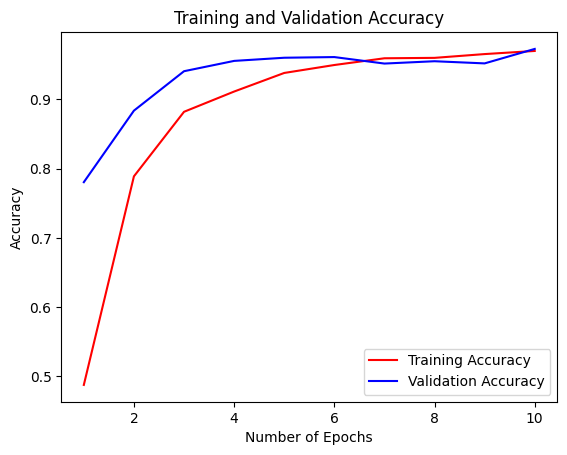

In [61]:
import matplotlib.pyplot as plt

# Get the number of epochs from the history
epochs = range(1, len(history.history['accuracy']) + 1)

# Plot training accuracy
plt.plot(epochs, history.history['accuracy'], color='red', label='Training Accuracy')

# Plot validation accuracy
plt.plot(epochs, history.history['val_accuracy'], color='blue', label='Validation Accuracy')

plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
plt.show()


In [62]:
class_name = validation_set.class_names
class_name

['Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___healthy']

In [64]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'svalid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 4158 files belonging to 9 classes.


In [65]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

130/130 ━━━━━━━━━━━━━━━━━━━━ 23s 173ms/step


(array([[1.0000000e+00, 2.0957666e-08, 5.3887101e-17, ..., 2.9016793e-09,
         5.1315056e-22, 3.3313708e-16],
        [1.9479380e-06, 6.5912883e-07, 3.3556141e-03, ..., 1.0024875e-03,
         1.3604666e-11, 9.9559677e-01],
        [1.0000000e+00, 1.1649571e-13, 1.6847480e-26, ..., 4.1608041e-12,
         6.7232899e-32, 2.0976162e-25],
        ...,
        [6.6363123e-11, 3.3897084e-08, 2.1106518e-06, ..., 1.7909546e-05,
         3.3088593e-10, 9.9998003e-01],
        [4.0504249e-11, 4.2344541e-09, 1.1533345e-07, ..., 2.8204686e-06,
         3.8540346e-10, 9.9999690e-01],
        [6.6932072e-16, 2.1453681e-14, 2.2966295e-12, ..., 2.6089460e-06,
         8.4488757e-17, 9.9999738e-01]], dtype=float32),
 (4158, 9))

In [66]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [67]:
predicted_categories

<tf.Tensor: shape=(4158,), dtype=int64, numpy=array([0, 8, 0, ..., 8, 8, 8])>

In [68]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)
true_categories

2024-09-03 00:48:41.140529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(4158, 9), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [69]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(4158,), dtype=int64, numpy=array([0, 0, 0, ..., 8, 8, 8])>

In [70]:
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
 print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                        precision    recall  f1-score   support

                 Potato___Early_blight       0.96      0.99      0.98       485
                  Potato___Late_blight       0.98      0.94      0.96       485
                      Potato___healthy       0.97      0.98      0.98       456
              Strawberry___Leaf_scorch       0.97      1.00      0.98       444
                  Strawberry___healthy       0.97      1.00      0.98       456
               Tomato___Bacterial_spot       0.97      0.95      0.96       425
           Tomato___Septoria_leaf_spot       0.96      0.92      0.94       436
Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.98      0.99      0.99       490
                      Tomato___healthy       0.98      0.98      0.98       481

                              accuracy                           0.97      4158
                             macro avg       0.97      0.97      0.97      4158
                          weighted avg

Confusion Matix Visualization

In [72]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(9, 9)

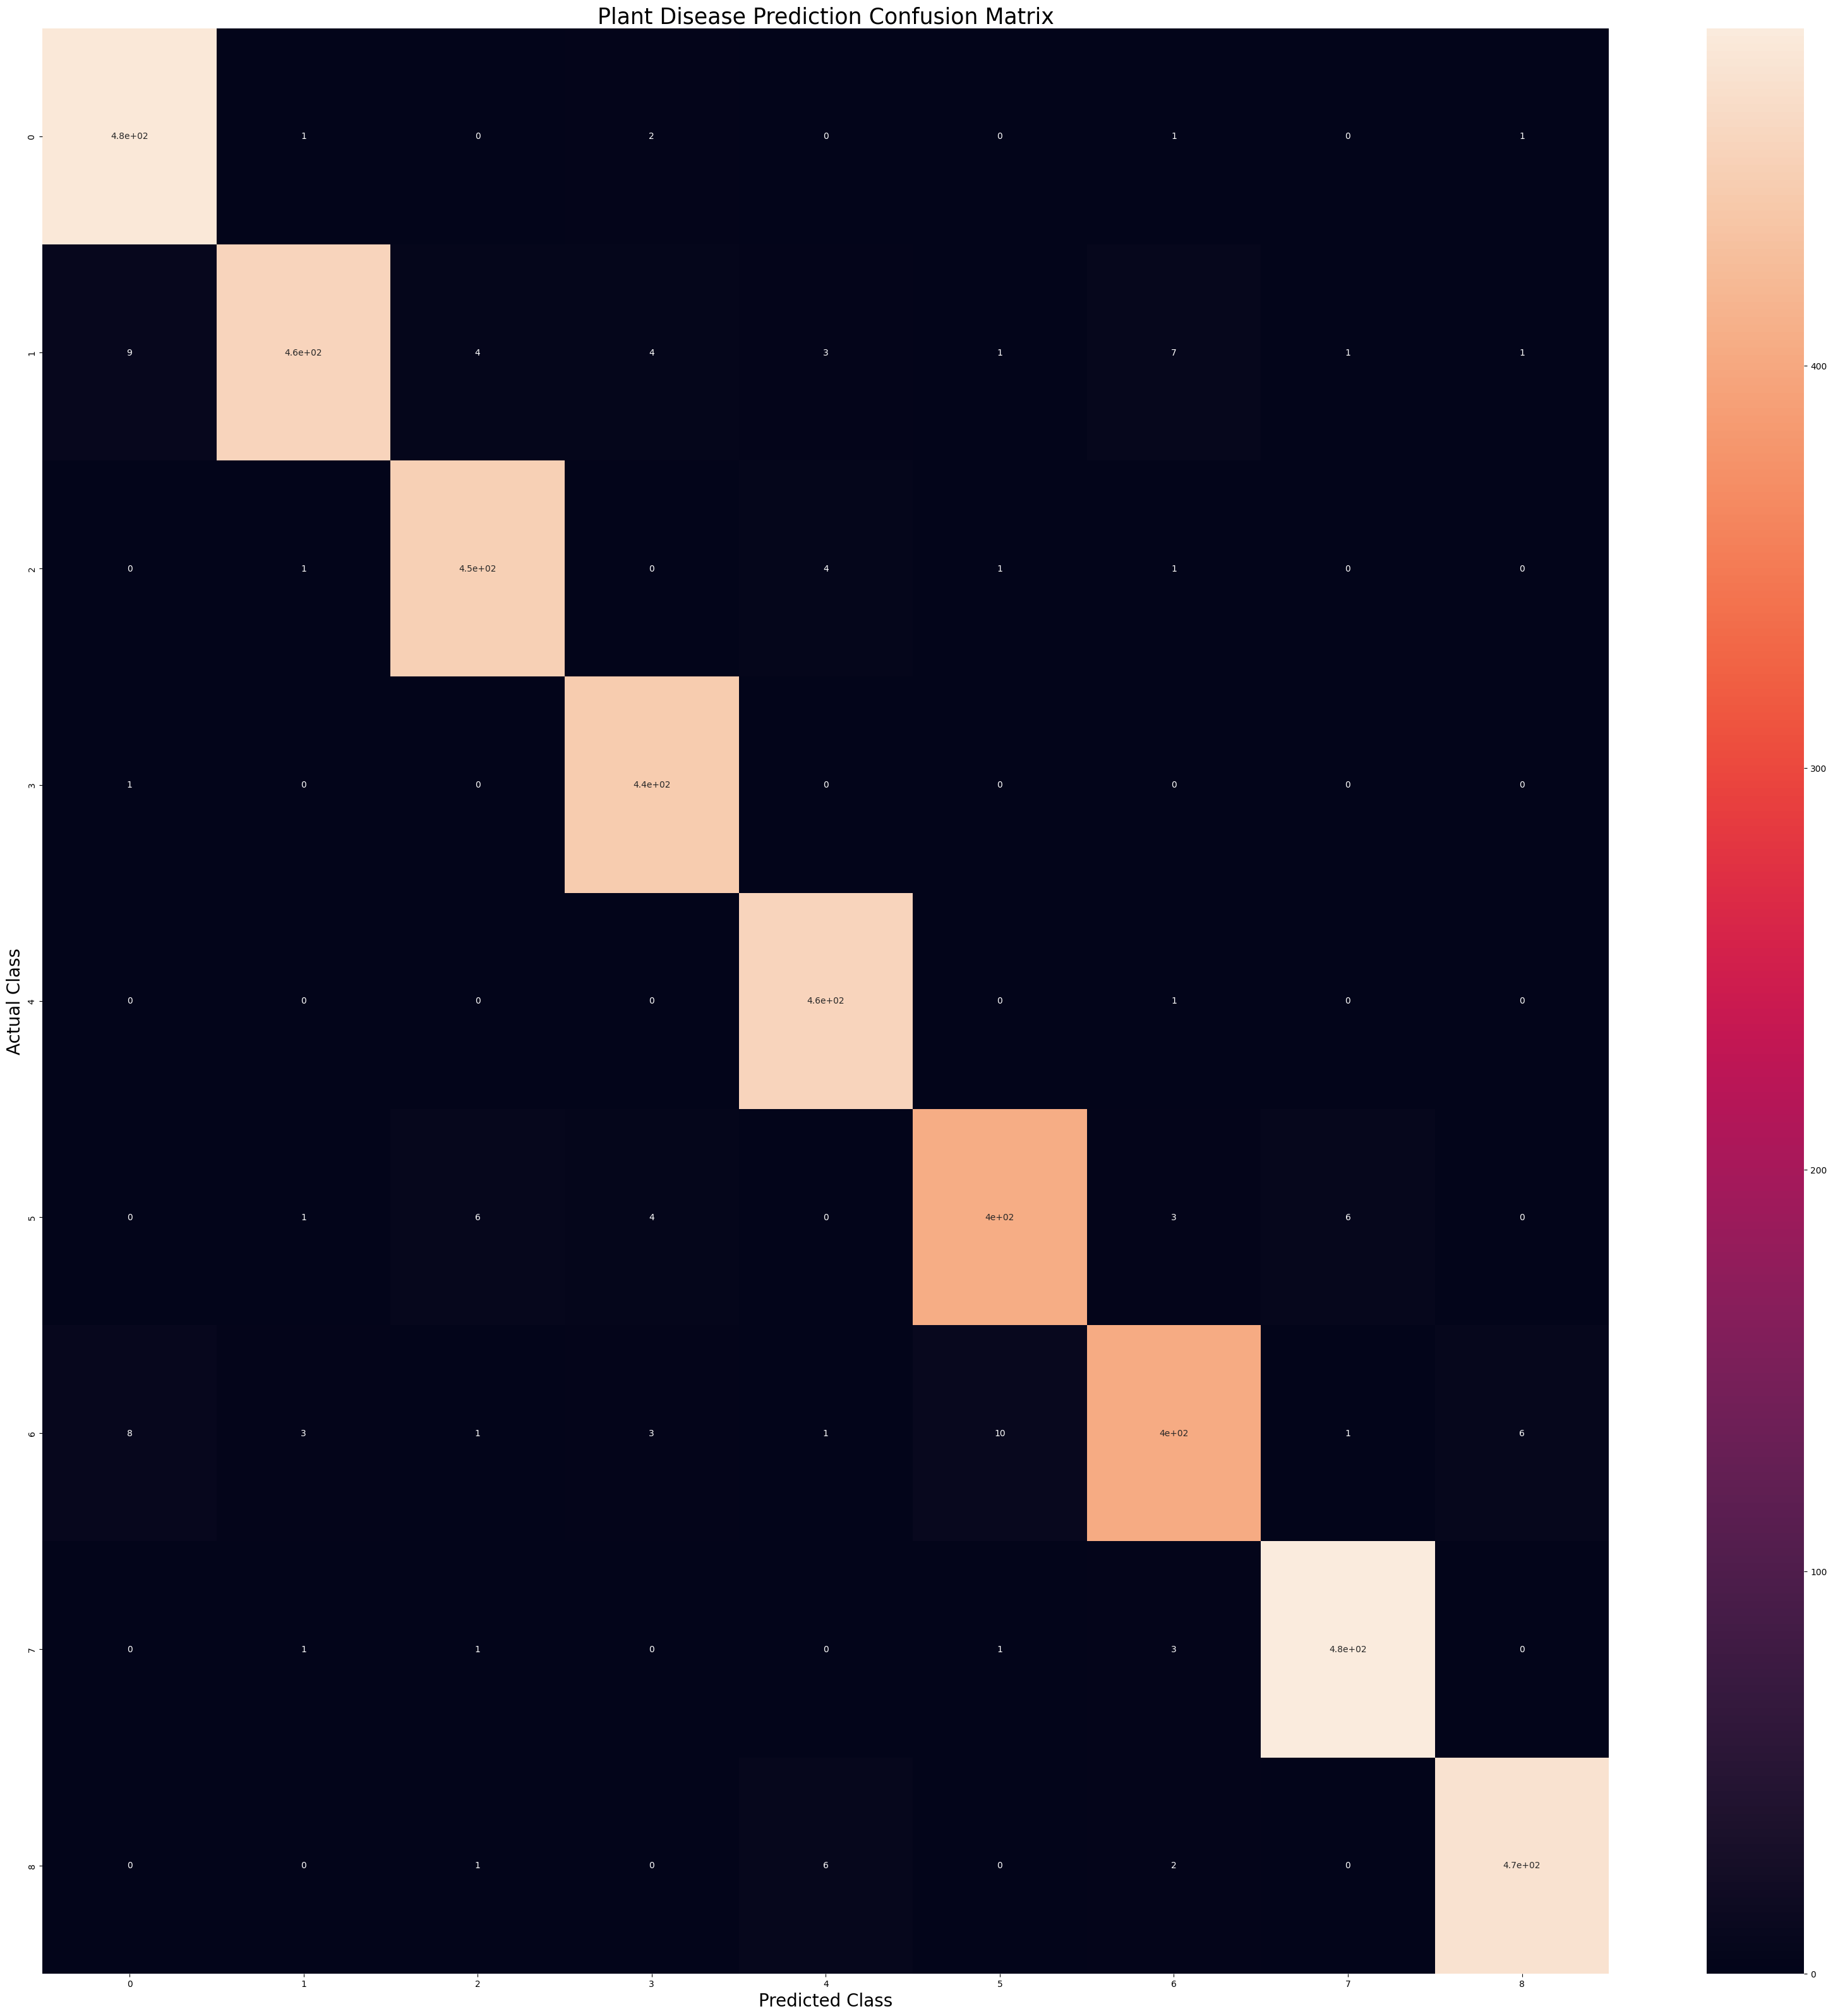

In [73]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title ("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()